# Computational Homework #5

**Due by midnight on Monday March 15 2021**. Answer all of the following problems. These problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


## Computational Problems

### Problem  #1

Load the ${\tt prostate}$ data into R using the faraway package. The prostate data frame has 97 rows and 9 columns. It comes from a study on 97 men with prostate cancer who were due to receive a radical prostatectomy.

In [2]:
install.packages("faraway")

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
library(faraway)
data(prostate)

#### (a) Conduct MLR with lpsa as the response and all of the other variables as predictors. Compute the 90% and 95% confidence intervals for the parameter associated with the age variable. Using these intervals, what could we have deduced about the p-value for age in the regression summary. 

In [7]:
prostate_model=lm(lpsa~.,data=prostate)
summary(prostate_model)


Call:
lm(formula = lpsa ~ ., data = prostate)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7331 -0.3713 -0.0170  0.4141  1.6381 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.669337   1.296387   0.516  0.60693    
lcavol       0.587022   0.087920   6.677 2.11e-09 ***
lweight      0.454467   0.170012   2.673  0.00896 ** 
age         -0.019637   0.011173  -1.758  0.08229 .  
lbph         0.107054   0.058449   1.832  0.07040 .  
svi          0.766157   0.244309   3.136  0.00233 ** 
lcp         -0.105474   0.091013  -1.159  0.24964    
gleason      0.045142   0.157465   0.287  0.77503    
pgg45        0.004525   0.004421   1.024  0.30886    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7084 on 88 degrees of freedom
Multiple R-squared:  0.6548,	Adjusted R-squared:  0.6234 
F-statistic: 20.86 on 8 and 88 DF,  p-value: < 2.2e-16


In [8]:
confint(prostate_model,"age", level=0.90)
confint(prostate_model,"age", level=0.95)

,5 %,95 %
age,-0.0382102,-0.001064151


,2.5 %,97.5 %
age,-0.04184062,0.002566267


Answer:

The p-value is not significant because the age esitmate -0.019637 is within the confidence interval.

#### (b) In class, we discussed a reason why conducting several individual hypothesis tests (e.g., t-tests for regression parameters) is problematic. It turns out that computing individual confidence intervals has a similar issue. Instead, we might compute a "joint confidence region" for several parameters.  Compute and display the 95% joint confidence region for the parameters associated with age and lbph. Plot the origin on this display. The location of the origin on the display tells us the outcome of a certain hypothesis test. State the test and its outcome. 

The ellipse package and corresponding function should help here. Use the code below (and help files) as a guide.

In [10]:
library(ellipse)
#plot(ellipse(NameOfModel,c,type = "l") #c is a vector specifying the indices of the desired parameters

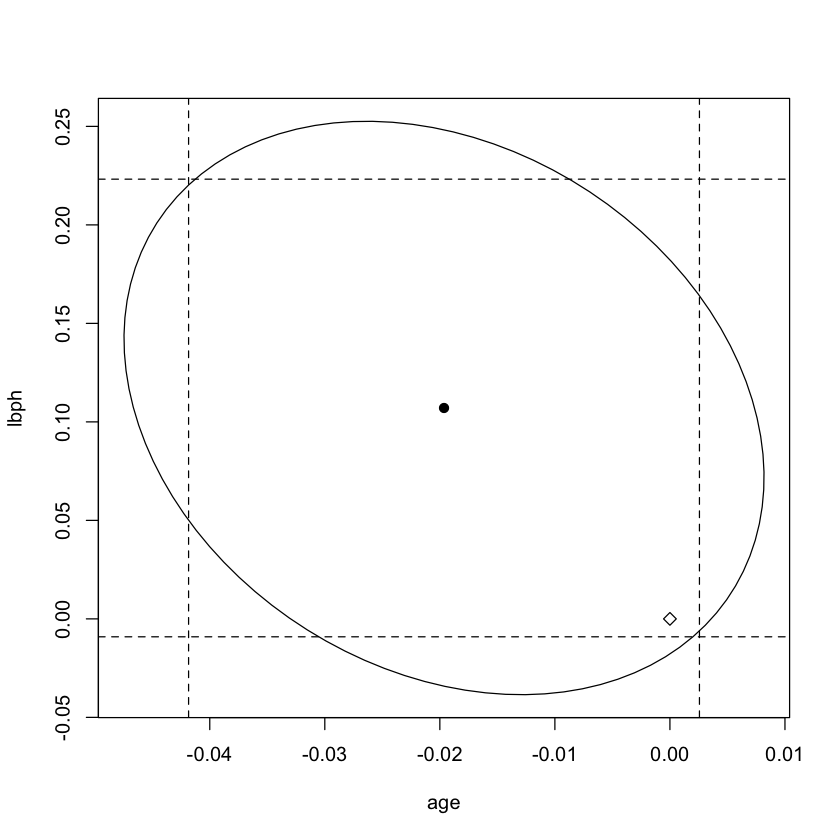

In [12]:
plot(ellipse(prostate_model,c("age","lbph"),level = 0.95),,type = "l")
points(coef(prostate_model)["age"], coef(prostate_model)["lbph"], pch=19)
points(0,0,pch=5)
abline(v=confint(prostate_model)[4,],lty=2)
abline(h=confint(prostate_model)[5,],lty=2)

Answer:

The joint null hypothesis is that the parameter associated with age and lbph are both 0. We cannot reject the null hypothesis because the origin lies inside the ellipse. 

#### (c) Remove all predictors that are not significant at the $\alpha = 0.05$ level. Test this model against the original model. Which model is preferred?

In [14]:
prostate_model_new=lm(lpsa~lcavol+lweight+svi,data=prostate)
anova(prostate_model,prostate_model_new)

#null: reduced model is preferred

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
88,44.16302,NA,NA,NA,NA
93,47.78486,-5,-3.621837,1.443387,0.2167334


Answer:

The null hypothesis is that the reduced model is preferred. The null hypothesis is not rejected, so it tells us that such a simplification to remove the not significant predictors is justifiable. Therefore, the reduced model is preferred. 

### Problem #2

This [link](https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt) contains advertising data. This dataset contains, in thousands of dollars, TV, Radio, and Newspaper budgets for 200 different markets along with the Sales, in thousands of units, for each market.

#### (a) Load the dataset using the link above and split the data into a training set and a test set, as done in the previous homework. (Remove the variable X.)

In [16]:
advertise = read.table(
  "https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt",
  quote = "\"",
  comment.char = "",
  stringsAsFactors = FALSE)

In [18]:
smp_size <- floor(0.8 * nrow(advertise))

set.seed(4)
train_n <- sample(seq_len(nrow(advertise)), size = smp_size)

train_set <- advertise[train_n, ]
test_set <- advertise[-train_n, ]

#### (b) Fit the full MLR model. Which variables are statistically significant at the 5% level? Discuss the difference between statistical and practical significance in this context. Also, the estimate for newspaper is negative. Do you actually think that sales *suffer* as a result of newspaper advertising?

In [19]:
advertise_model=lm(sales~.,data=train_set)
summary(advertise_model)


Call:
lm(formula = sales ~ ., data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0075 -0.7502  0.1988  1.1838  2.6112 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.1642664  0.3056019  10.354   <2e-16 ***
TV           0.0436049  0.0014254  30.591   <2e-16 ***
radio        0.1977673  0.0087067  22.714   <2e-16 ***
newspaper   -0.0005811  0.0059802  -0.097    0.923    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.529 on 156 degrees of freedom
Multiple R-squared:  0.9171,	Adjusted R-squared:  0.9155 
F-statistic: 575.4 on 3 and 156 DF,  p-value: < 2.2e-16


Answer:

The newspaper variable is not statistically significant at the 5% level, and I don't think that sales would actually suffer as a result of newspaper advertising.The statistical significance focuses on the p value, and judges whether the p value is smaller than 0.05. The practical significance should focus on which coefficient is higher because it represents higher correlation with sales, and people would care more about increasing the sales.

#### (c) Imagine that, in your test set, you don't have any response measurements. Compute predictions--including 95% *prediction* intervals--of sales for all measurements in your test set. Print the prediction MSE and the first five prediction intervals.

In [20]:
pred = predict(advertise_model,newdata = test_set,interval = "prediction",level=0.95)
pred[1:5,]

,fit,lwr,upr
6,13.17087,10.05965,16.28208
15,18.54383,15.50374,21.58393
16,21.08742,18.02787,24.14696
18,23.23383,20.16542,26.30225
20,14.30280,11.27034,17.33527


In [21]:
rmse <- function(x,y) mean((x-y)^2)

rmse(pred,test_set$sales)

[1] 11.38693

#### (d) Add some polynomial terms to the model. Specifically, add $TV^2$ and $radio^2$ to the model. To do this, you'll need to use the I() function: I(predictor^2). Comment on the significance of these terms. Assume $\alpha = 0.05$.

In [22]:
advertise_poly<-lm(sales~TV+radio+I(TV^2)+I(radio^2)+newspaper,data=train_set)
summary(advertise_poly)


Call:
lm(formula = sales ~ TV + radio + I(TV^2) + I(radio^2) + newspaper, 
    data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2737 -0.8485  0.0776  0.9509  2.9819 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.307e+00  4.346e-01   5.309 3.79e-07 ***
TV           6.937e-02  5.195e-03  13.354  < 2e-16 ***
radio        1.423e-01  2.922e-02   4.869 2.75e-06 ***
I(TV^2)     -8.934e-05  1.734e-05  -5.151 7.81e-07 ***
I(radio^2)   1.214e-03  5.938e-04   2.044   0.0426 *  
newspaper   -1.715e-04  5.505e-03  -0.031   0.9752    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.405 on 154 degrees of freedom
Multiple R-squared:  0.9309,	Adjusted R-squared:  0.9287 
F-statistic:   415 on 5 and 154 DF,  p-value: < 2.2e-16


Answer:

TV and radio still have statistical significance, TV^2 and radio^2 are also statistically significant, and newspaper coefficient is still not statistically significant. 

#### (e) Is it surprising that $R^2$ increased from the model in (c) to the model in (d)? Explain why or why not.

Answer:

I think the increased R^2 is not surprising because we are adding additional predictors.

#### (f) Conduct a test (not just individual t-tests) to decide whether you should keep the quadratic terms in your model.

In [23]:
anova(advertise_model,advertise_poly)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
156,364.6423,NA,NA,NA,NA
154,303.9274,2,60.71492,15.38212,8.119224e-07


Answer:

The null hyppthesis is that the new model is preferred. The p-value is smaller than 0.05 indicates that the null can be rejected here and the proposed added polynomial terms are not justifiable. Therefore, we should not keep the quadratic terms in the model.

### Problem #3

#### For the teengamb data, fit a model with gamble as the response and the other variables as predictors. Look for violations of:

1. Constant Variance
2. Normality
3. Linearity

#### Write a short report detailing your findings.

In [1]:
library(faraway)
data(teengamb)

In [2]:
teengamb_model=lm(gamble~.,data=teengamb)

In [3]:
summary(teengamb_model)


Call:
lm(formula = gamble ~ ., data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.082 -11.320  -1.451   9.452  94.252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.55565   17.19680   1.312   0.1968    
sex         -22.11833    8.21111  -2.694   0.0101 *  
status        0.05223    0.28111   0.186   0.8535    
income        4.96198    1.02539   4.839 1.79e-05 ***
verbal       -2.95949    2.17215  -1.362   0.1803    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.69 on 42 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.4816 
F-statistic: 11.69 on 4 and 42 DF,  p-value: 1.815e-06


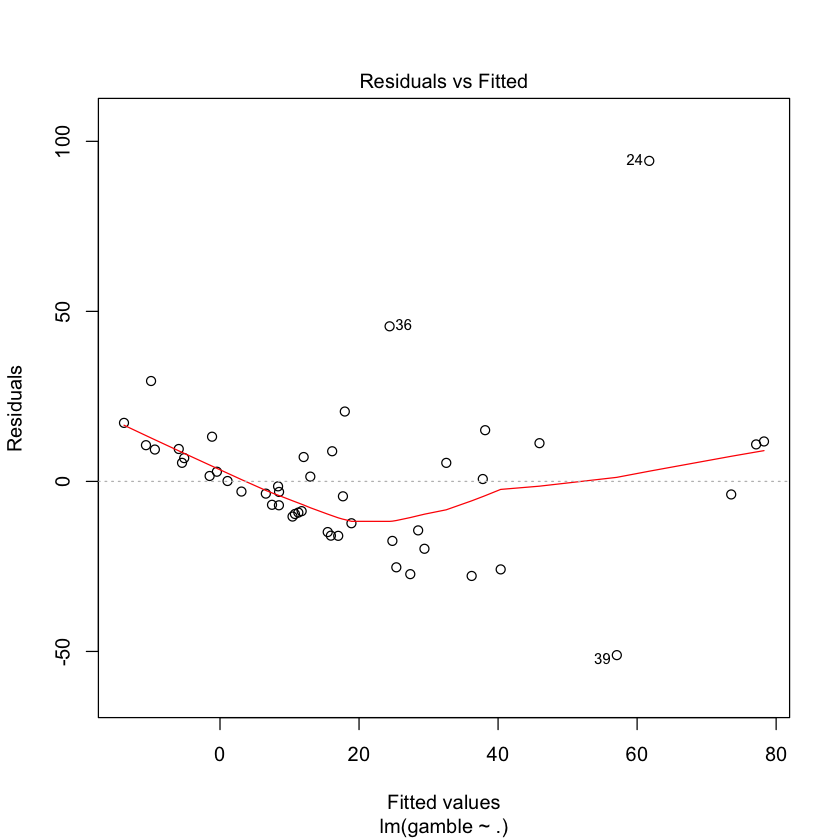

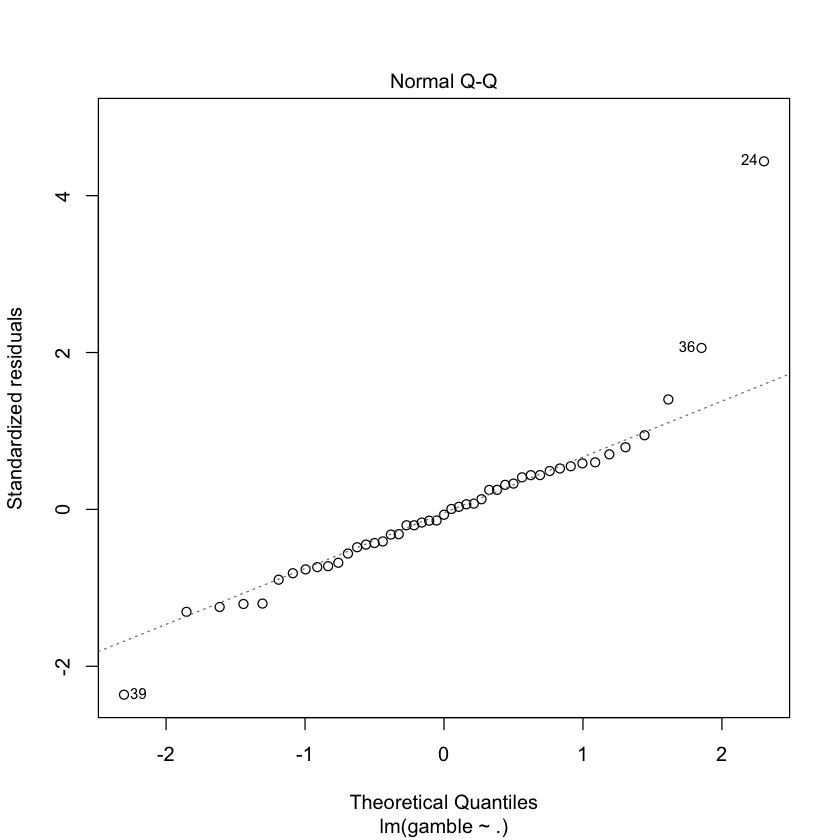

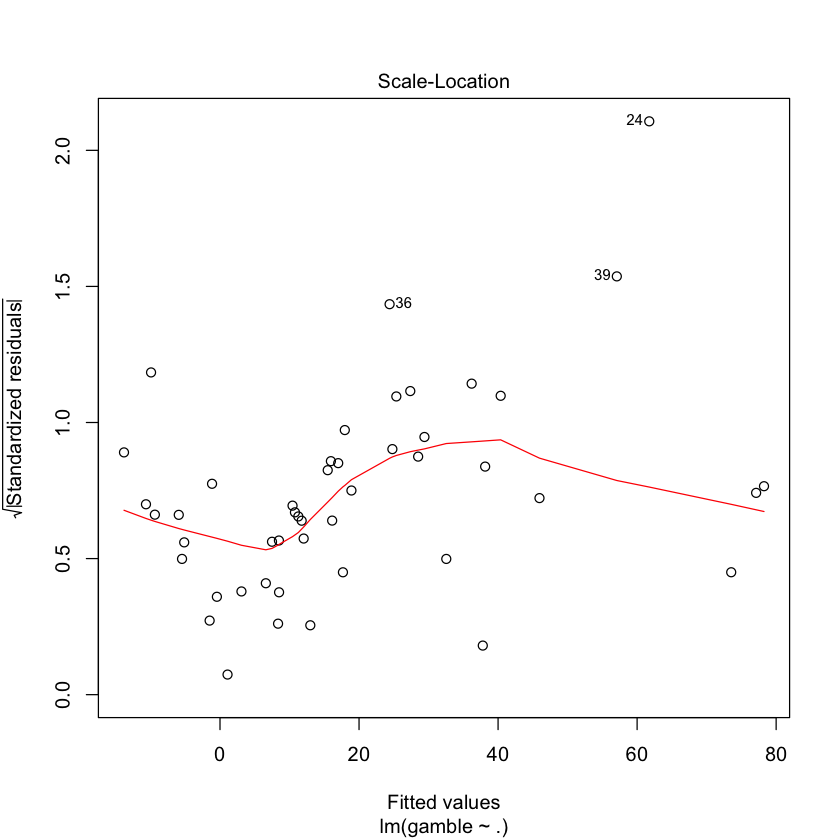

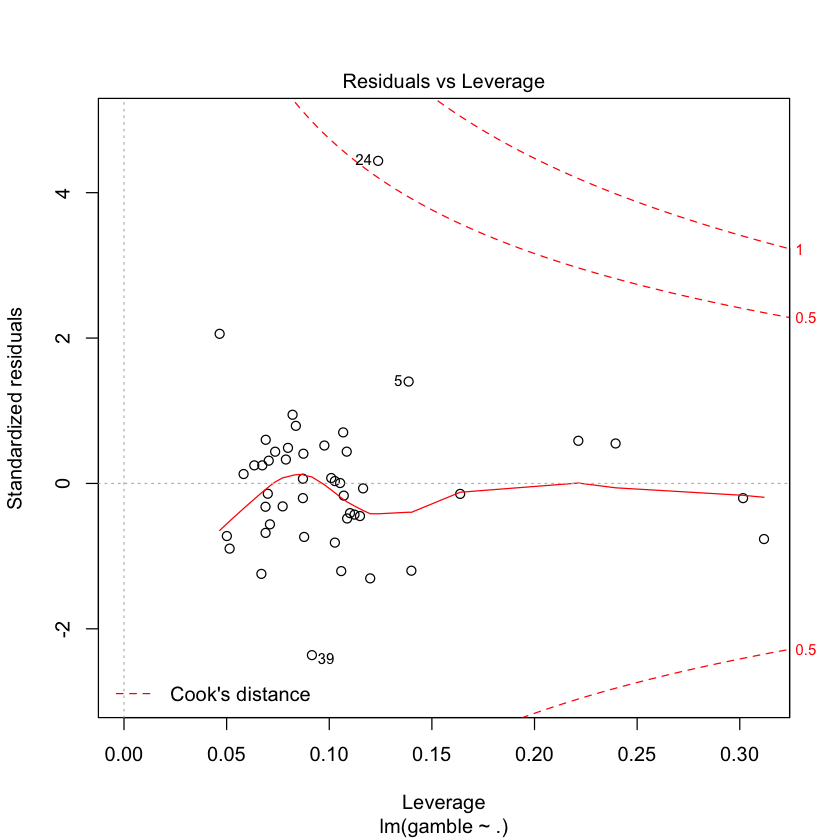

In [25]:
plot(teengamb_model)

Answer:

The sex and income parameters are significantly correlated with gamble, while status and verbal are not significantly correlated with gamble. the adjusted R^2 for the test is 0.48, which means only 48% of the variance in the data is explained by the linear model. The residuals vs fitted plot has a fitted red line but the line is not a horizontal straight line, so it violates linearity. As the fitted values increase, the residuals become more spread out, so it also violates constant variance. The normal Q-Q plot looks normal, so it doesn't violate the normality. 